<a href="https://colab.research.google.com/github/memoandrea/Sinandah/blob/main/reconstructing_handwritten_digits_using_an_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT NECESSARY LIBRARIES

import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt


In [ ]:
#DEFINE PARAMETERS

#for reproducibility
np.random.seed(111)
tf.random.set_seed(111)

batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-3
hidden_dim = 128
original_dim = 784


In [ ]:
#LOAD MNIST DATA FROM TENSORFLOW DATASETS
"""normalize data so that pixel values lie between 0 and 1: divide each pixel element by 255.
reshape the tensors from 2D to 1D.
generate slices of tensors.
labels are not used being used to train the network: autoencoders learn via unsupervised learning"""

(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 25

x_train = np.reshape(x_train,(x_train.shape[0], 784))
x_test = np.reshape(x_test,(x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

In [ ]:
#INSTANTIATE THE AUTOENCODER MODEL AND DEFINE THE LOSS AND OPTIMIZER TO BE USED FOR TRAINING

class Autoencoder(tf.keras.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.original_dim = original_dim

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(self.hidden_dim, activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(self.original_dim, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(hidden_dim = hidden_dim, original_dim = original_dim)
opt = tf.keras.optimizers.Adam(learning_rate = 1e-2)

def loss(preds, real):
    return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [ ]:
#DEFINE A CUSTOM TRAINING
#NOT USING THE AUTO TRAINING LOOP

#record the gradients as they are calculated  and implicitly apply the gradients to
#all the trainable variables  of our model

def train(loss, model, opt, original):
    with tf.GradientTape() as tape:
        preds = model(original)
        loss_value = loss(preds, original)
        gradients = tape.gradient(loss_value, model.trainable_variables)
        gradient_variables = zip(gradients, model.trainable_variables)
        opt.apply_gradients(gradient_variables)
        return loss_value

In [ ]:
#invoke the train() function in a training loop  with the dataset fed into the model in batches

def train_loop(model, opt, loss, dataset, epochs = 20):
    loss_history = [] # Initialize a list to store loss values
    for epoch in range(epochs):
      epoch_loss = 0
      for step, batch_features in enumerate(dataset):
        loss_values = train(loss, model, opt, batch_features)
        epoch_loss += loss_values
        loss_history.append(epoch_loss) # Append loss to the list

        print('Epoch'{}/{}.'Loss':{}.format(epoch + 1, epochs, epoch_loss.numpy()))
    return loss_history # Return the loss history


In [19]:
#TRAIN THE AUTOENCODER

loss_history = train_loop(autoencoder, opt, loss, training_dataset, epochs = 20) # Store the returned loss history

Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format(epoch + 1, epochs, epoch_loss.numpy())
Epoch{}/{}.Loss:{}.format

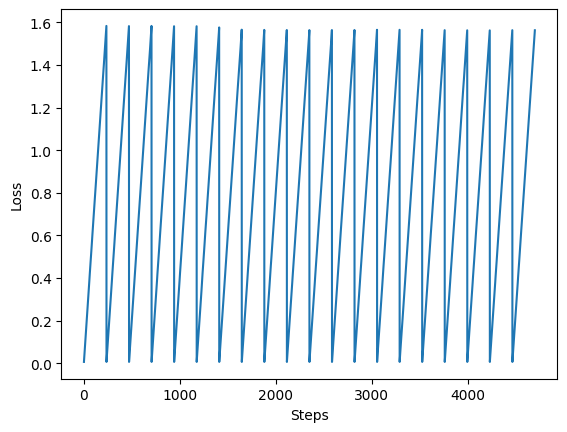

In [21]:


#PLOT

plt.plot(range(len(loss_history)), loss_history) # Use loss_history and its length for plotting
plt.xlabel('Steps') # The x-axis represents training steps, not epochs
plt.ylabel('Loss')
plt.show()

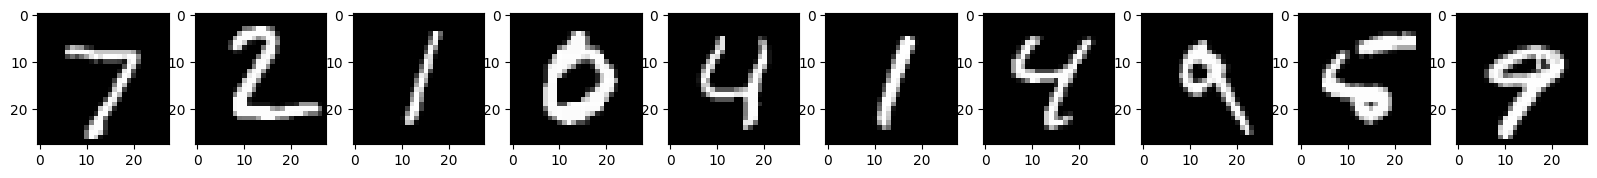

In [23]:
#ORIGINAL

#digits to display
number = 10
plt.figure(figsize= (20, 4))

for index in range(number):

  #display original
  ax = plt.subplot(2, number, index + 1)
  plt.imshow(x_test[index].reshape(28, 28), cmap = 'gray')
  ax.get_xaxis().set_visible = (False)
  ax.get_yaxis().set_visible = (False)



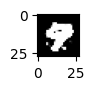

In [33]:
#RECONSTRUCTED

# remove the extra indent
ax = plt.subplot(2, number, index + 1)
# Flatten the input image before passing it to the autoencoder
flattened_input = x_test[index].reshape(1, 784) # Reshape to (1, 784) for batch of 1
reconstructed_img = autoencoder(flattened_input).numpy().reshape(28, 28)
plt.imshow(reconstructed_img, cmap = 'gray') # Call autoencoder, convert output to NumPy array, reshape, then apply cmap
ax.get_xaxis().set_visible = (False)
ax.get_yaxis().set_visible = (False)
plt.show()
